Testing out delaying emissions by an hour from initial simulation spin up at 9 AM sim start

In [5]:
import netCDF4 as nc
import os
import matplotlib.pyplot as plt
import numpy as np


Note that the way the `aero_emis_dist` files are defined, emissions are based on *elapsed time* rather than the clock time of the simulation. For example, to delay emissions from the start of the sim (irrespective of the UTC start time) by 1 hour, the `num_conc` variable in the `aero_emit_dist` files should look like

``` 
data:

 num_conc =
  0, 0, 0,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000,
  144000000, 2560000000, 800000000 ;
}
```

In [6]:
output_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'

emisstest_subdir = os.path.join(output_path, 'slurm-1909469') # 9:00 to 10:05
emisstest_aerodata = nc.Dataset(os.path.join(emisstest_subdir, 'aerosols_d01_2023-03-20_09:00:00'))

BC only emitted (not in the IC) so should be a good test for when emissions occur

In [7]:
# BC values each minute at center of domain at the surface
emisstest_aerodata['pmc_BC'][:, 0, 20, 20]

masked_array(data=[0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
                   0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
                   0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
                   0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
                   0.0000000e+00, 3.0409364e-09],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

Text(0.5, 1.0, 'i=20, j=20, k=0')

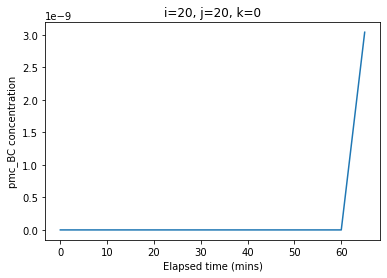

In [9]:
plt.plot(np.arange(0, 66, 5), emisstest_aerodata['pmc_BC'][:, 0, 20, 20])
plt.xlabel('Elapsed time (mins)')
plt.ylabel('pmc_BC concentration')
plt.title('i=20, j=20, k=0')